## <font color="blue">Business Statement</font>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## <font color="blue">Objective</font>

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<br>



**Which variables are significant in predicting the demand for shared bikes<br>How well those variables describe the bike demands**   


### <font color="teal">Approach</font>

1. Data Loading
2. Understanding data<br>
       i) Shape and Size<br>
       ii) Data Info Data Type while Loading<br>
       iii) Data statistics<br>
       iv) View 10 records<br>
       v) Find number of unique values in each variable<br>
       vi) Find number of missing values in each variable<br>
3. Indetifying Categorical and Continous Data
5. EDA
       i) univariant Analysis on Categorical Data<br>
       ii) Bi-Variant Analysis on Univariant Data<br>
       iii) Univariant Analysis on Continuous Data<br>
       iv) Bivariant Analysis on Continous Data<br>
       v) Multivarient Analysis<br>
       vi) Data Elimination<br>
       vii) Correlation<br>
6. Create Dummies(Transform Categorical Data)
7. Create Train Test Data
8. Data Scaling
9. Feature Selection
10. Model Building
11. Residual Analysis
12. Evaluation and R2 score
13. End Notes


In [65]:
# To prepare notebook
# To filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

# To import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson

# To display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### <font color="sky blue">1. Data Loading</font>

In [2]:
# Load Data
data = pd.read_csv("data/day.csv")

## Understanding data

#### i) Shape and Size

In [3]:
data.shape

(730, 16)

**Number of records**: 730 <br>
**Number of variables**: 16

#### ii) Data Info Data Type while Loading

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### iii) Data statistics

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### iv) View 10 records

In [6]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### v) Find number of unique values in each variable

In [7]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### vi) Find number of missing values in each variable

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Note : No Missing values present in the dataset**

### <font color="sky blue"> 3. Indetifying Categorical and Continous Data</font>

**Target or Dependent Variable is cnt**<br>
**"casual", "registered" are part of Target**

In [9]:
# Categorical and Continuous Data Identification and fixing data type
categorical_cols = data.nunique() < 50 
categorical_cols = categorical_cols[categorical_cols == True].index.to_list()
print("CATEGORICAL COLUMNS:  ",categorical_cols)

numeric_cols = set(data.columns.to_list())-set(categorical_cols)
print("NUMERICAL COLUMNS : ", numeric_cols)

CATEGORICAL COLUMNS:   ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
NUMERICAL COLUMNS :  {'hum', 'cnt', 'casual', 'dteday', 'atemp', 'instant', 'windspeed', 'registered', 'temp'}


In [10]:
# To Convert Categorical varaibles data type to caregory 
data[categorical_cols] = data[categorical_cols].astype("category")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    category
 4   mnth        730 non-null    category
 5   holiday     730 non-null    category
 6   weekday     730 non-null    category
 7   workingday  730 non-null    category
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.8+ KB


### <font color="sky blue">5. EDA</font>

#### i) univariant Analysis on Categorical Data

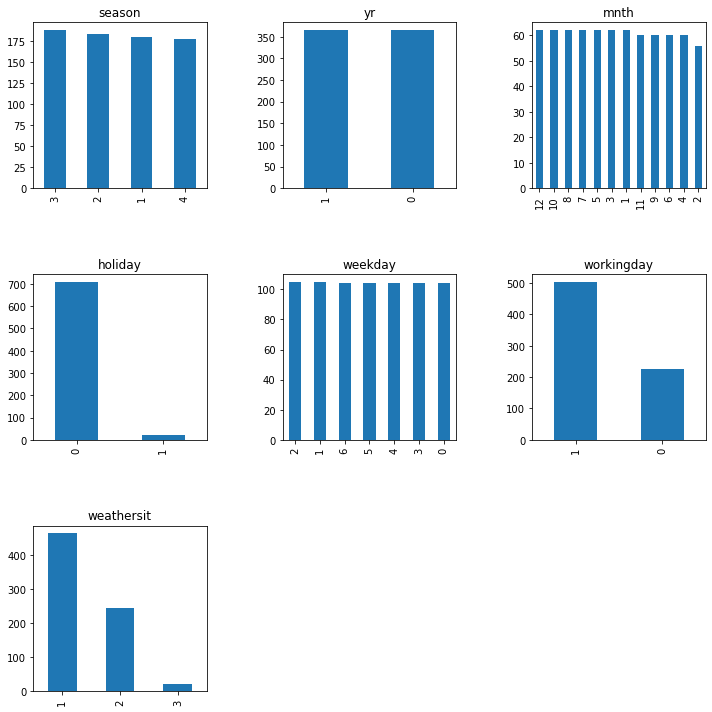

In [12]:
# Categorical Univariant 
fig = plt.figure(figsize=(10,10))
for index, col in enumerate(categorical_cols):
    ax= fig.add_subplot(3,3, index+1)
    ax.set_title(col)
    data[col].value_counts().plot(kind ="bar")

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()


**Observations:** TODO

In [13]:
data_yr_1 = data[data.yr == 1]
data_yr_0 = data[data.yr == 0]

In [14]:
data_yr_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,01-01-2019,1,1,1,0,2,1,1,15.170000,18.78105,69.2500,12.875189,686,1608,2294
366,367,02-01-2019,1,1,1,1,3,0,1,11.194763,12.61520,38.1304,22.087555,244,1707,1951
367,368,03-01-2019,1,1,1,0,4,1,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236
368,369,04-01-2019,1,1,1,0,5,1,2,4.407500,5.96685,41.4583,12.374900,95,2273,2368
369,370,05-01-2019,1,1,1,0,6,0,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272


<AxesSubplot:>

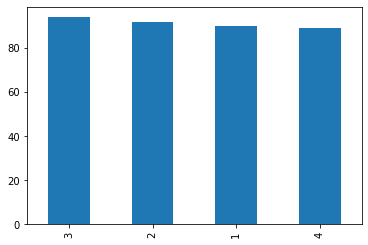

In [15]:
data_yr_1['season'].value_counts().plot(kind ="bar")

<AxesSubplot:>

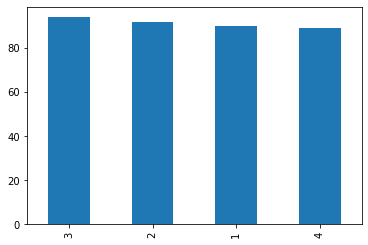

In [16]:
data_yr_0['season'].value_counts().plot(kind ="bar")

#### ii) Bi-Variant Analysis on Univariant Data

<Figure size 720x720 with 0 Axes>

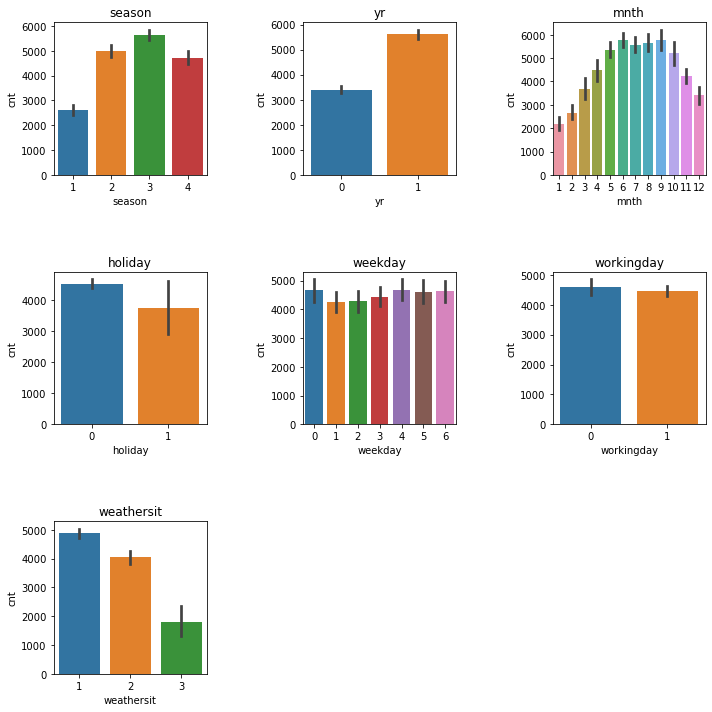

In [17]:
# Categorical Bivarant
# Bivariant for categorical caregorical column and cnt
plt.figure(figsize = (10,10))
fig = plt.figure(figsize=(10,10))
for index, col in enumerate(categorical_cols):
    ax = fig.add_subplot(3,3, index+1)
    ax.set_title(col)
    sns.barplot(data[col], data.cnt)

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()


**Observations:** TODO

#### iii) Univariant Analysis on Continuous Data

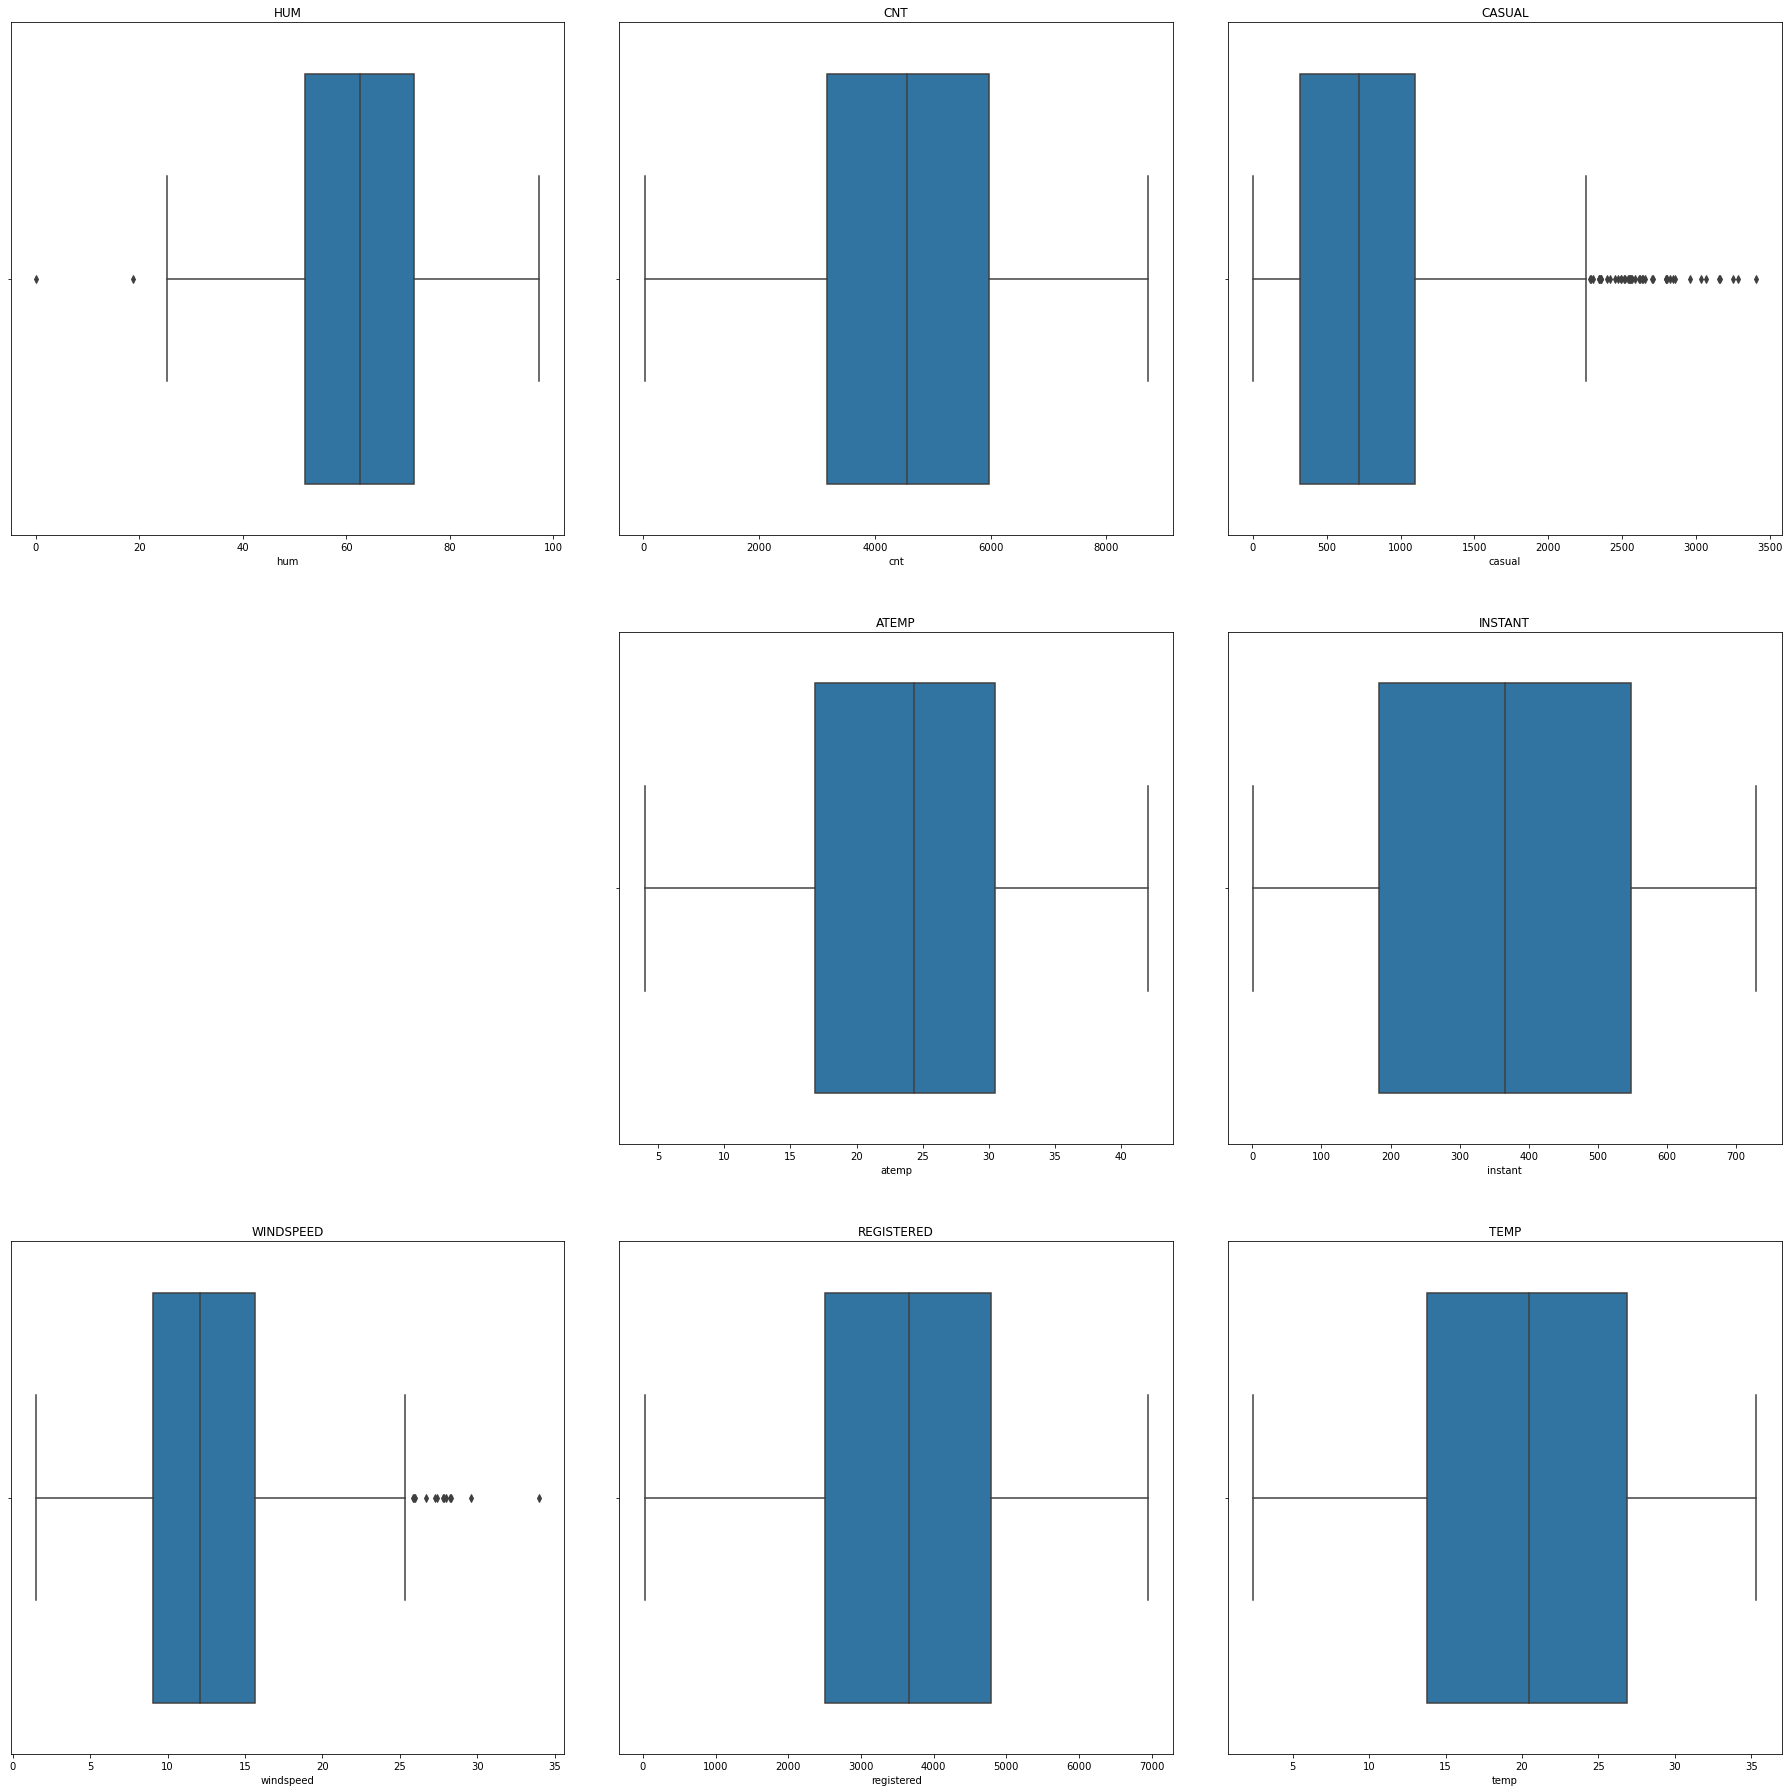

In [18]:
# Correlation in continous variables
fig = plt.figure(figsize=(25,25))
for index, col in enumerate(numeric_cols):
    if col != "dteday":
        ax= fig.add_subplot(3,3, index+1)
        ax.set_title(col.upper())
        sns.boxplot(data[col])

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

**Observation**: TODO

#### iv) Bivariant Analysis on Continous Data

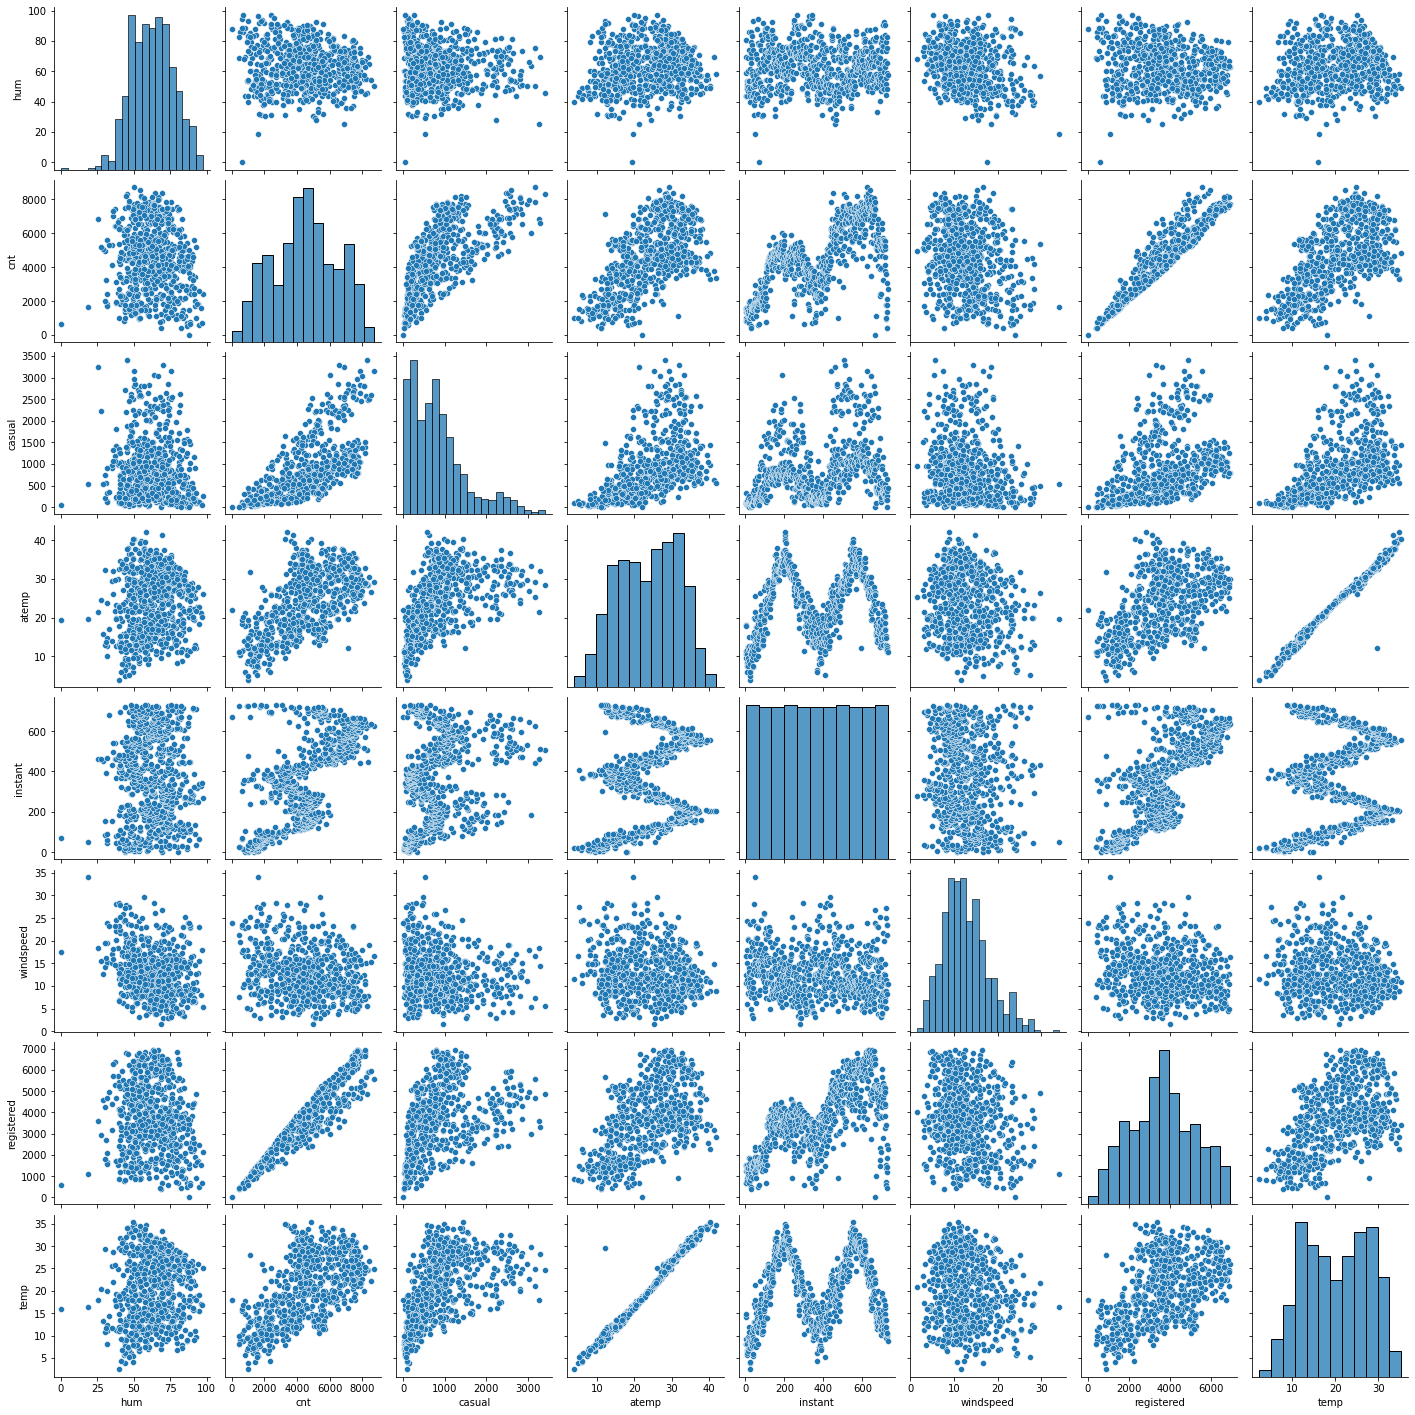

In [19]:
# Continuous variables Univariant analysis.
sns.pairplot(data[numeric_cols])

**Observations**: TODO

#### v) Caregorical - Continuous   variable Analysis( categorical data vs cnt)

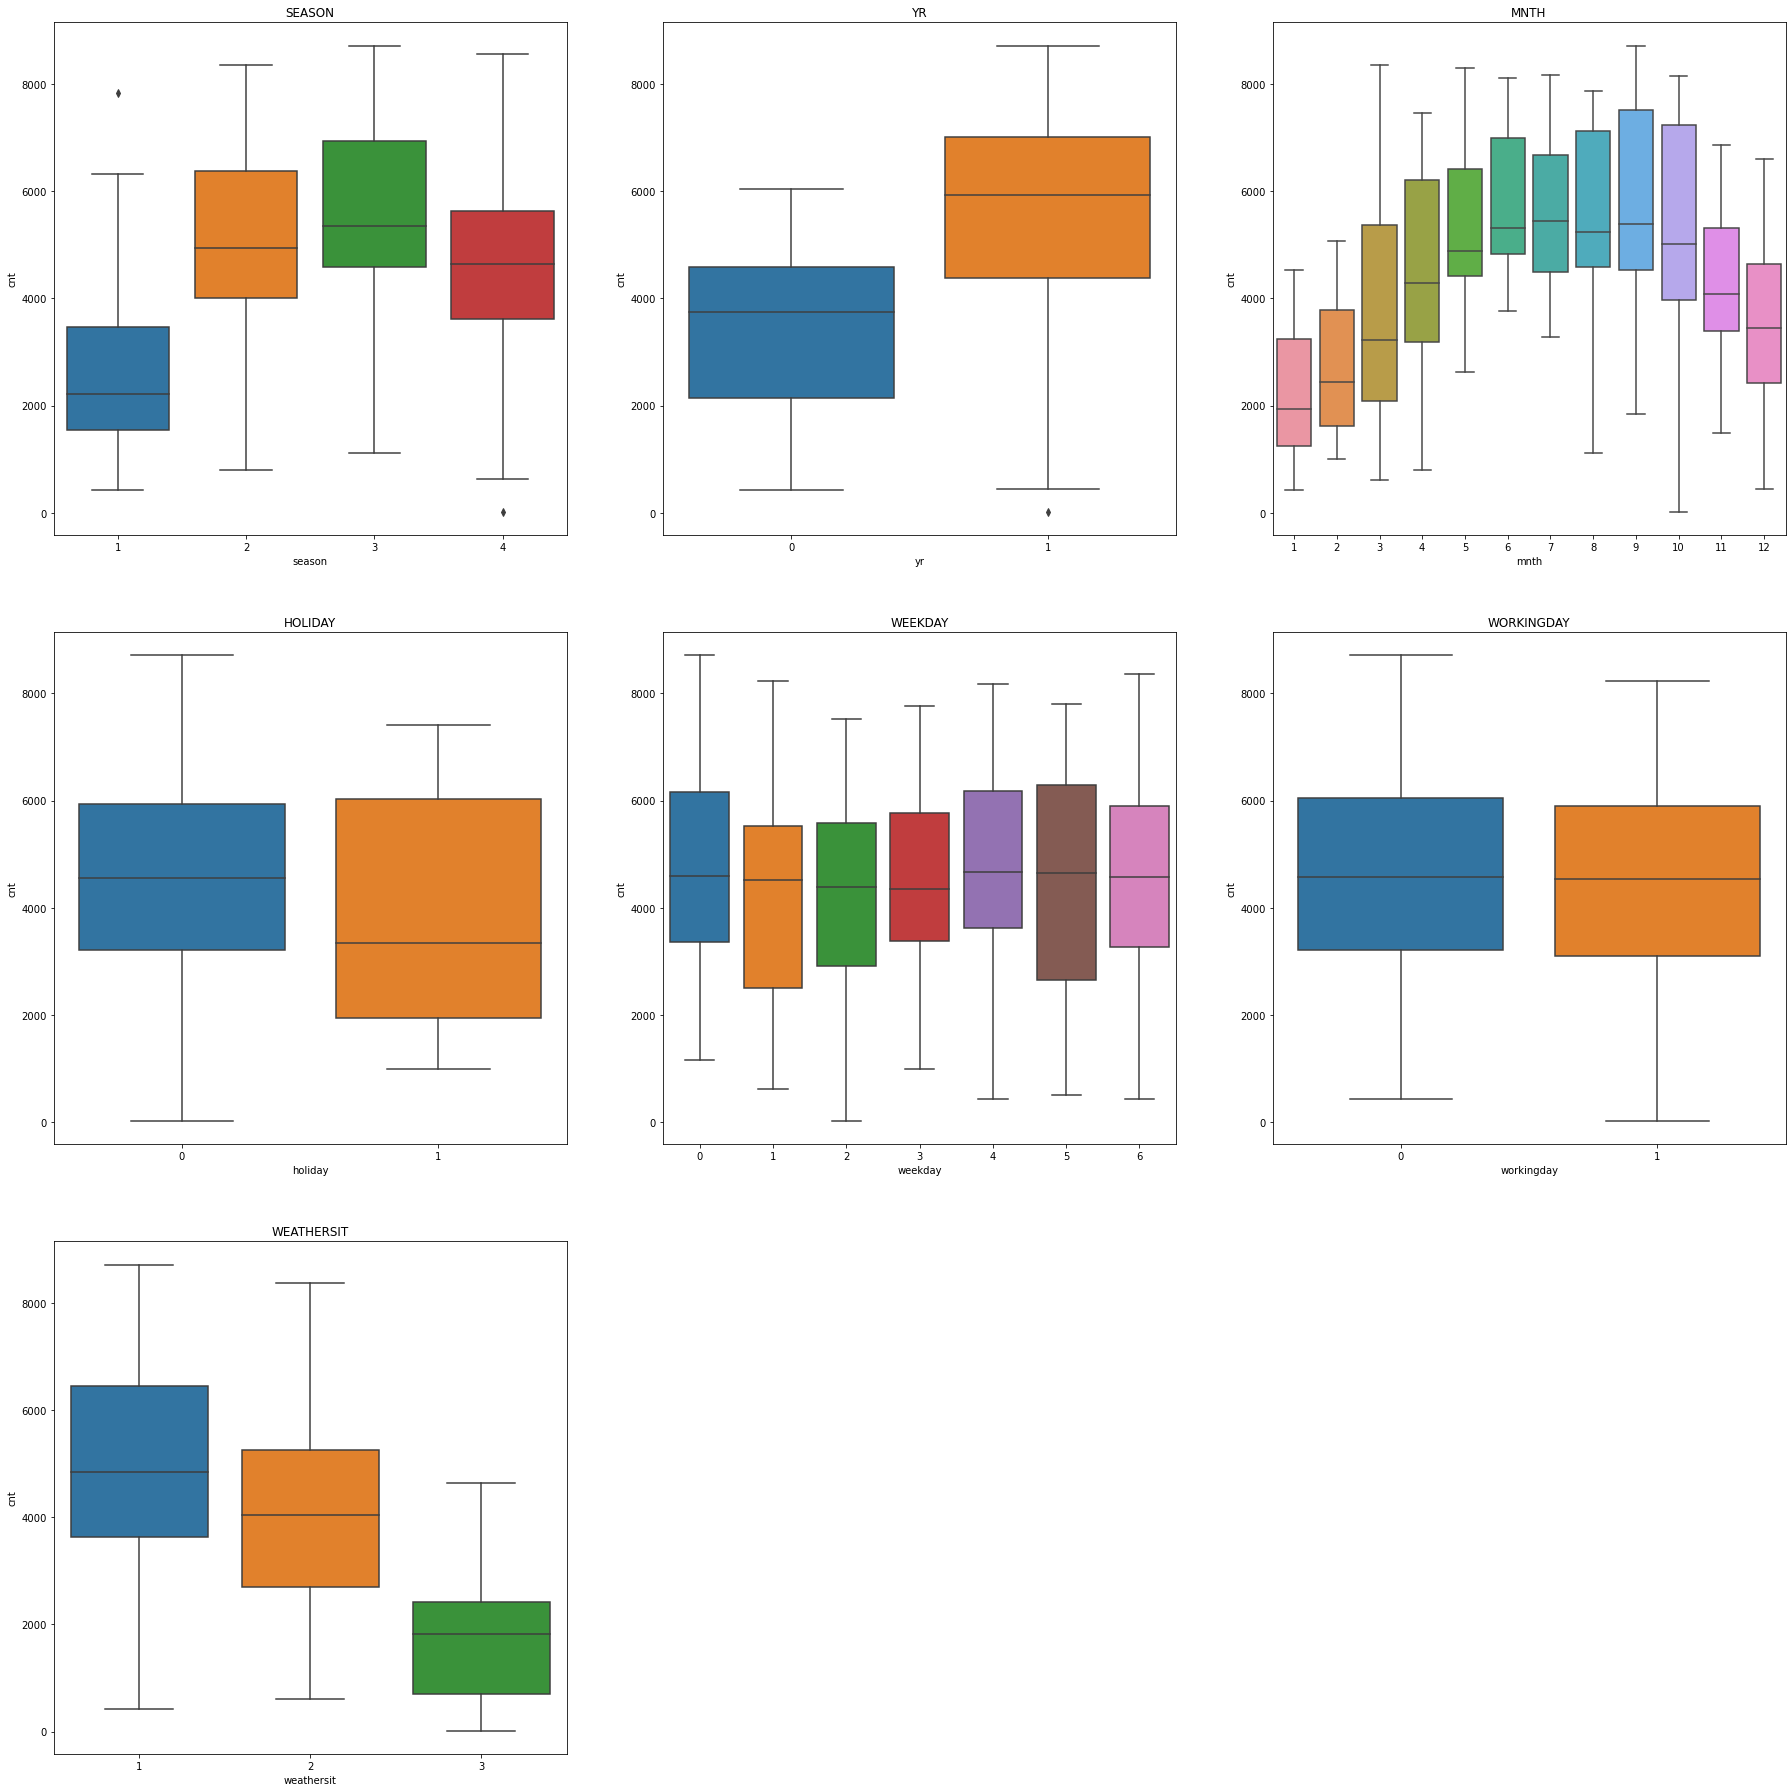

In [20]:
# Cat -Continous
# Correlation in continous variables
fig = plt.figure(figsize=(25,25))
for index, col in enumerate(categorical_cols):
    if col != "dteday":
        ax= fig.add_subplot(3,3, index+1)
        ax.set_title(col.upper())
        sns.boxplot(data[col], data.cnt, data=data)

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

**Observations**: TODO

#### vi) Correlation

<AxesSubplot:>

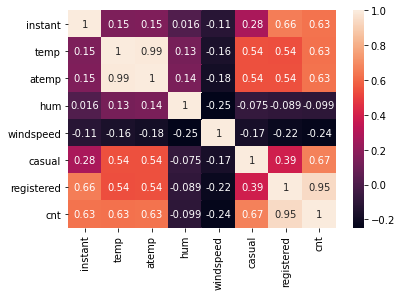

In [21]:
sns.heatmap(data.corr(), annot=True)

**Observations**:TODO

#### Vii) Data Elimination

In [22]:
#Data elimination
data.drop(['instant', 'dteday', "casual", "registered", "season", "atemp"], axis=1, inplace=True)

In [23]:
categorical_cols  = list(set(categorical_cols) - {"season"})
numeric_cols = list(numeric_cols - {"dteday", "instant", "casual", "registered", "atemp"})

**instant :** not relavant. represents record number<br>
**dteday :** Not very much describe the behaviour<br>
**casual, registered :** Part of Target. Data in these both variables can be described with 'cnt'<br>
**season :** Season and months are correlated. So Taking Month variable and dropinf 'season'
**atemp :** highly correlated with temp.

### <font color="sky blue"> 6. Create Dummies(Transform Categorical Data)</font>

1. Binary encoding to binary categorical data 0/1<br>
2. Represent categorical data using dummies

In [24]:
#To create Dummies using pandas
#Create n dummies. To avoid redundancy in dummies droping first dummy 
categorical_data = pd.get_dummies(data[categorical_cols], drop_first=True)

In [25]:
#To add Dummies to original data
data = pd.concat([data, categorical_data], axis=1 )
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [26]:
#dropping original variables since dummies representing categorical data
data.drop(categorical_cols, axis=1, inplace=True)

In [27]:
data.head()

,temp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [28]:
# To Find Number of dimensions after dummies
len(data.columns)

26

### <font color="sky blue">7. Create Train Test Data</font>

In [29]:
# tarin test Split 
# Train size 70%
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)

### <font color="sky blue">8. Data Scalling</font>

In [30]:
#scalling : using normalize scaling to bring data into (0,1) range
# Train Data  finding parameters and trasforming data
scaler = MinMaxScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

#transforming data on train scalar
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [31]:
df_train.describe()

,temp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.507843,0.025490,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.711765,0.345098,0.029412
std,0.225858,0.145846,0.169803,0.224421,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.500429,0.157763,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.453386,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Creating Train and Test Target and separating target from train test  predictors
Y_train = df_train.pop("cnt")
X_train = df_train
Y_test = df_test.pop("cnt")
X_test = df_test

### <font  color="sky blue">9. Feature Selection</font>

In [33]:
#feature selection
# using RFE To find to 15 best features

lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm,15)
rfe.fit(X_train, Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('yr_1', True, 1),
 ('holiday_1', True, 1),
 ('weekday_1', False, 11),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 9),
 ('workingday_1', False, 5),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [35]:
columns = X_train.columns[rfe.support_]
columns.to_list()

['temp',
 'hum',
 'windspeed',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'yr_1',
 'holiday_1',
 'weathersit_3']

### <font color="sky blue">10. Model Building</font>

In [36]:
X_train_rfe = X_train[columns] # rfe has retuned top 15 features. so considering top 15 features for model building

In [37]:
# Model Building
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
lm = sm.OLS(Y_train, X_train_rfe).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.75e-174
Time:                        16:50:46   Log-Likelihood:                 479.15
No. Observations:                 510   AIC:                            -926.3
Df Residuals:                     494   BIC:                            -858.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2738      0.028      9.759   

**Observtions**: TODO

In [40]:
# To display VIF score of each independent variable
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Features,VIF
0,temp,10.999667
1,hum,11.261822
2,windspeed,3.881876
3,mnth_3,1.412762
4,mnth_4,1.371761
5,mnth_5,1.530973
6,mnth_6,1.628688
7,mnth_8,1.852493
8,mnth_9,1.559130
9,mnth_10,1.456886


In [41]:
X_train_rfe.columns 

Index(['const', 'temp', 'hum', 'windspeed', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'yr_1',
       'holiday_1', 'weathersit_3'],
      dtype='object')

In [42]:
# Removing Hum since the it has VIF > 5

X_train_rfe.drop(["hum"], axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.95e-161
Time:                        16:50:46   Log-Likelihood:                 446.15
No. Observations:                 510   AIC:                            -862.3
Df Residuals:                     495   BIC:                            -798.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0957      0.019      5.001   

In [43]:
# VIF after removing hum
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif["Features"] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Features,VIF
0,temp,6.668386
1,windspeed,3.495187
2,mnth_3,1.357363
3,mnth_4,1.364702
4,mnth_5,1.489471
5,mnth_6,1.620096
6,mnth_8,1.852406
7,mnth_9,1.530509
8,mnth_10,1.358431
9,mnth_11,1.261592


In [44]:
columns_to_drop = list(set(X_train) - set(X_train_new.columns))
columns_to_drop

['weekday_5',
 'hum',
 'weekday_4',
 'mnth_7',
 'mnth_2',
 'workingday_1',
 'weekday_1',
 'weekday_6',
 'weathersit_2',
 'weekday_3',
 'weekday_2']

### <font color="sky blue"> 11. Residual Analysis</font>

In [45]:
# Test Model Evolution
Y_train_predict = lm.predict(X_train_rfe)

<AxesSubplot:ylabel='Density'>

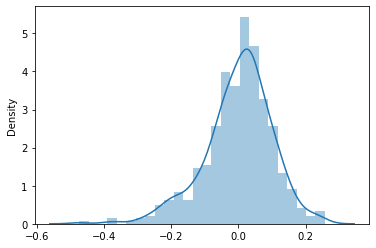

In [46]:
# Residual Analysis
res = Y_train - Y_train_predict
sns.distplot(res)

### <font color="sky blue"> 12. Evaluation</font>

In [47]:
X_test.drop(columns_to_drop, axis=1, inplace=True) #  Test Data with features selected in above model

In [48]:
X_test

,temp,windspeed,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1,holiday_1,weathersit_3
184,0.831783,0.084219,0,0,0,0,0,0,0,0,0,0,1,0
535,0.901354,0.153728,0,0,0,1,0,0,0,0,0,1,0,0
299,0.511964,0.334206,0,0,0,0,0,0,1,0,0,0,0,0
221,0.881625,0.339570,0,0,0,0,1,0,0,0,0,0,0,0
152,0.817246,0.537414,0,0,0,1,0,0,0,0,0,0,0,0
404,0.256524,0.326196,0,0,0,0,0,0,0,0,0,1,0,0
198,0.856704,0.372990,0,0,0,0,0,0,0,0,0,0,0,0
171,0.774672,0.276724,0,0,0,1,0,0,0,0,0,0,0,0
512,0.814131,0.331536,0,0,1,0,0,0,0,0,0,1,1,0
200,0.883701,0.153738,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
#test predict
X_test_sm = sm.add_constant(X_test)
Y_test_predict = lm.predict(X_test_sm)

In [50]:
X_test_sm.columns.to_list()  # added for verification 

['const',
 'temp',
 'windspeed',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'yr_1',
 'holiday_1',
 'weathersit_3']

In [52]:
#R2 Value
r2_score(y_true=Y_test, y_pred =Y_test_predict)

0.761723358612187

### <font color="sky blue">Verifying Assumption</font>

**Residual following normal distribution**

<AxesSubplot:ylabel='Density'>

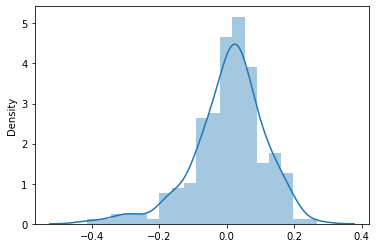

In [51]:
# Distribution of error residual
#residual following normal distribution
# mean = 0
test_res = Y_test - Y_test_predict
sns.distplot(test_res)

**Residual Should have realtive constant variance**

<AxesSubplot:>

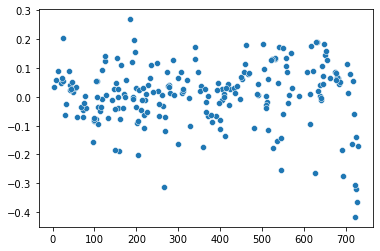

In [64]:
sns.scatterplot(test_res.index, test_res)

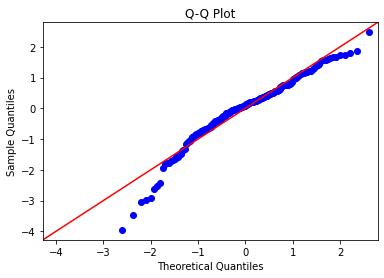

In [70]:
sm.qqplot(test_res, line = "45", fit = True)
plt.title("Q-Q Plot")
plt.show()

In [61]:
s = pd.DataFrame({"actual":Y_test, "predicted":Y_test_predict})

**Linear relationship between predictors and tartget** 

<AxesSubplot:xlabel='actual', ylabel='predicted'>

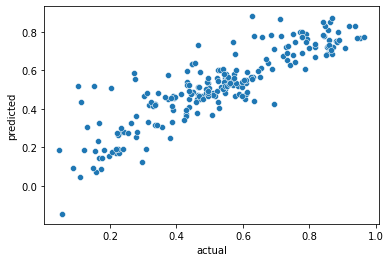

In [62]:
sns.scatterplot(x="actual", y="predicted" ,data=s)

**No Correlation in Error Terms**

In [69]:
durbin_score = durbin_watson(test_res)
print('Durbin-Watson:', durbin_score)
if durbin_score < 1.5:
    print('Signs of positive autocorrelation')
    print('Assumption not satisfied')
elif durbin_score > 2.5:
    print('Signs of negative autocorrelation')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation')
    print('Assumption satisfied')

Durbin-Watson: 1.7956088432573476
Little to no autocorrelation
Assumption satisfied


### <font color="sky blue">12. End Notes</font>

Top features : temp, windspeed,month, holiday, weathersit, year<br>
R2 Score : 0.76<br>
Train score : 0.79